In [1]:
#Import modules
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
#Download the cvs file
#Read the csv, notice sep=','.. For CSV files created in Norwegian excel we need to use sep=';'#
#df = pd.read_csv(url, na_values=' ') we can use this for automatically convert blank space to nan values
url= r"C:\Users\berry\OneDrive - OsloMet\Lab-Introduksjon-til-kunstlig-intelligens\Lab-1\stud.csv"
df = pd.read_csv(url, sep=',')
df.head()

,StudentID,Age,email,hrsStudy,FinalGrade
0,47412,20,s47412@oslomet.no,5,46.0
1,15077,22,s15077@oslomet.no,0,65.0
2,15467,27,s15467@oslomet.no,1,26.0
3,17907,21,s17907@oslomet.no,6,68.0
4,13352,333,s13352@oslomet.no,4,34.0


In [3]:
df.describe()

,StudentID,FinalGrade
count,50.000000,49.000000
mean,48969.820000,71.653061
std,26870.066326,90.455917
min,10736.000000,24.000000
25%,26666.500000,39.000000
50%,44292.000000,60.000000
75%,70400.250000,78.000000
max,99823.000000,673.000000


In [4]:
df.isna().sum()

StudentID     0
Age           0
email         0
hrsStudy      0
FinalGrade    1
dtype: int64

In [5]:
#Lets first replace all empty cells wit np.nan
df=df.replace(r'^\s*$', np.nan, regex=True)
#and check again
df.isna().sum()

StudentID     0
Age           1
email         0
hrsStudy      1
FinalGrade    1
dtype: int64

In [6]:
#Lets first replace all empty cells wit np.nan
df=df.replace(r'^\s*$', np.nan, regex=True)
#and check again
df.isna().sum()

StudentID     0
Age           1
email         0
hrsStudy      1
FinalGrade    1
dtype: int64

In [7]:
#When dealing with missing values, we need to make to figure out if we can replace data
#with dummy values. Lets say Age isn't too important in this dataset, and we can replace missing
#age values with 0

df["Age"].replace(np.nan, 0, inplace=True)
#df = df['Age'].astype(str).astype(int)

In [8]:
df.isna().sum()

StudentID     0
Age           0
email         0
hrsStudy      1
FinalGrade    1
dtype: int64

In [9]:
#Since we believe the rest of the columns contains important data, we won't replace nan values with dummy data
#We will therefor delete rows containing nan data
df.dropna(inplace = True)
# inplace = True updates the df with the new data, alternative you can do df = df.dropna() or Newdf = df.dropna()
#And lets check again
df.isna().sum()

StudentID     0
Age           0
email         0
hrsStudy      0
FinalGrade    0
dtype: int64

In [10]:
#A easy way to convert object to int, is through sting, so we convert all values to strings, then ints
df['Age'] = df['Age'].astype(str).astype(int)
df['hrsStudy'] = df['hrsStudy'].astype(str).astype(int)

In [11]:
#So lets see then..
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudentID   48 non-null     int64  
 1   Age         48 non-null     int32  
 2   email       48 non-null     object 
 3   hrsStudy    48 non-null     int32  
 4   FinalGrade  48 non-null     float64
dtypes: float64(1), int32(2), int64(1), object(1)
memory usage: 1.9+ KB


,StudentID,Age,hrsStudy,FinalGrade
count,48.000000,48.000000,48.000000,48.000000
mean,50338.166667,35.666667,6.395833,72.083333
std,26526.981827,52.388619,3.648022,91.362461
min,11758.000000,0.000000,0.000000,24.000000
25%,28399.750000,22.000000,3.000000,38.750000
50%,45986.500000,25.000000,7.000000,61.000000
75%,71524.000000,31.000000,10.000000,78.500000
max,99823.000000,333.000000,11.000000,673.000000


<Axes: >

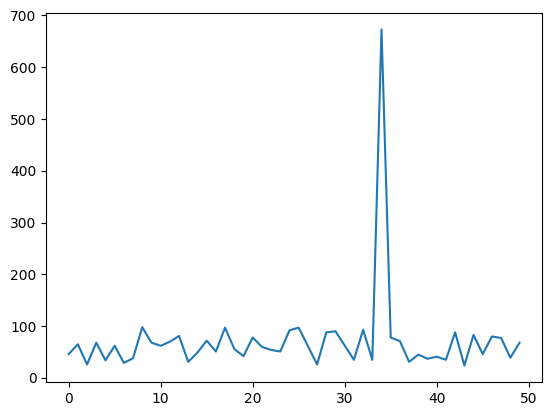

In [12]:
#We can now start to look for values that might be wrong.
#An example for FinalGrade, we see from df.describe() that the max value is 673, this is clearly wrong
#A way to visualize this is to do a plot

df["FinalGrade"].plot.line()


<Axes: >

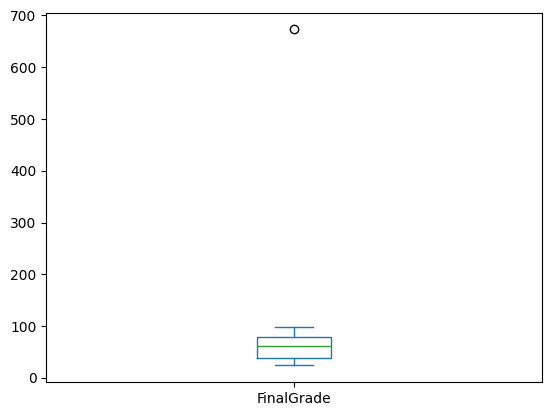

In [13]:
df["FinalGrade"].plot.box()

In [14]:
#We will look closer at removing outliers later, but we can remove them using the scipy package
#Calculate the z score
z_scores = stats.zscore(df["FinalGrade"])
abs_z_scores = np.abs(z_scores)

In [15]:
#And drop all rows in the third quantile
df.drop(df[abs_z_scores > 3].index, inplace=True)

<Axes: >

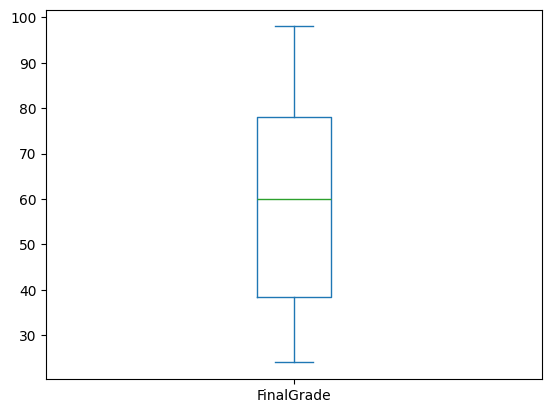

In [16]:
#Checking the column again to see if outliers are gone..
df["FinalGrade"].plot.box()

In [17]:
#Lets take a look at the end of our dataframe..
df.tail(5)

,StudentID,Age,email,hrsStudy,FinalGrade
45,62039,23,s62039@oslomet.no,4,46.0
46,42989,27,s42989@oslomet.no,0,80.0
47,85370,29,s85370@oslomet.no,2,77.0
48,63135,26,s63135@oslomet.no,9,39.0
49,28895,19,s28895@oslomet.no,10,68.0


In [18]:
#As you can see, the index counts to 49, but we have dropped several values.. to reset the index you can use
df = df.reset_index(drop=True)
df.tail(5)

,StudentID,Age,email,hrsStudy,FinalGrade
42,62039,23,s62039@oslomet.no,4,46.0
43,42989,27,s42989@oslomet.no,0,80.0
44,85370,29,s85370@oslomet.no,2,77.0
45,63135,26,s63135@oslomet.no,9,39.0
46,28895,19,s28895@oslomet.no,10,68.0


In [19]:
# create a list of our conditions
conditions = [
    (df['FinalGrade'] <= 50.0),
    (df['FinalGrade'] > 50.0) & (df['FinalGrade'] <= 60.0),
    (df['FinalGrade'] > 60.0) & (df['FinalGrade'] <= 70.0),
    (df['FinalGrade'] > 70.0) & (df['FinalGrade'] <= 80.0),
    (df['FinalGrade'] > 80.0) & (df['FinalGrade'] <= 90.0),
    (df['FinalGrade'] > 90.0)
    ]

# create a list of the values we want to assign for each condition
values = ['F', 'E', 'D', 'C', 'B', 'A']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Grade'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,StudentID,Age,email,hrsStudy,FinalGrade,Grade
0,47412,20,s47412@oslomet.no,5,46.0,F
1,15077,22,s15077@oslomet.no,0,65.0,D
2,15467,27,s15467@oslomet.no,1,26.0,F
3,17907,21,s17907@oslomet.no,6,68.0,D
4,13352,333,s13352@oslomet.no,4,34.0,F


In [20]:
#We can now see how many got the different grades by using groupby
df_gradeCount = df.groupby('Grade').count()

In [21]:
df_gradeCount.FinalGrade

Grade
A     5
B     5
C     6
D     7
E     5
F    19
Name: FinalGrade, dtype: int64

<Axes: xlabel='Grade'>

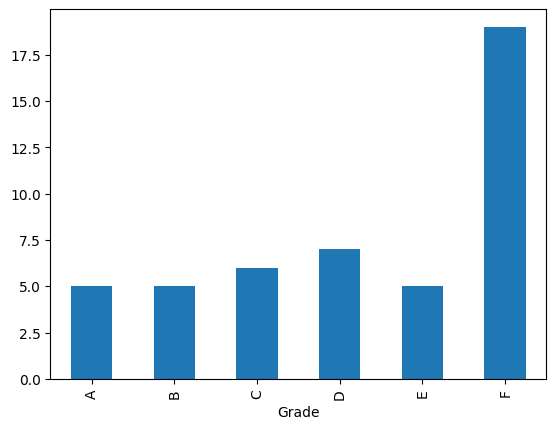

In [22]:
#And plot a barplot of the data

df_gradeCount["FinalGrade"].plot.bar()

<Axes: xlabel='Age', ylabel='Grade'>

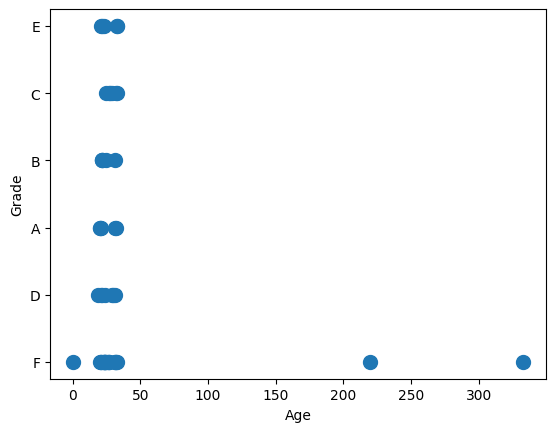

In [23]:
df.plot.scatter(x = 'Age', y = 'Grade', s = 100)

<Axes: xlabel='Age', ylabel='Grade'>

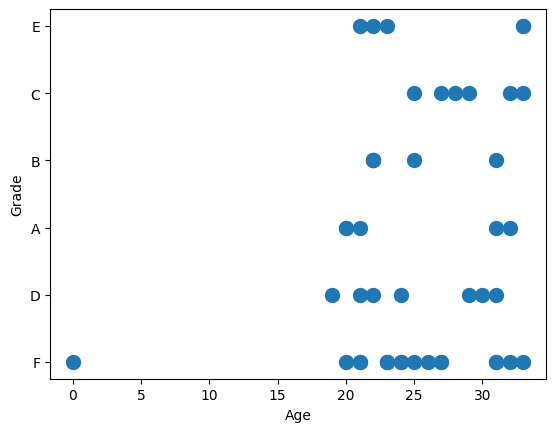

In [24]:
#Lets just remove the two outliers for a nicer plot.
z_scores = stats.zscore(df["Age"])
abs_z_scores = np.abs(z_scores)
df.drop(df[abs_z_scores > 3].index, inplace=True)
df.plot.scatter(x = 'Age', y = 'Grade', s = 100)

<Axes: ylabel='Frequency'>

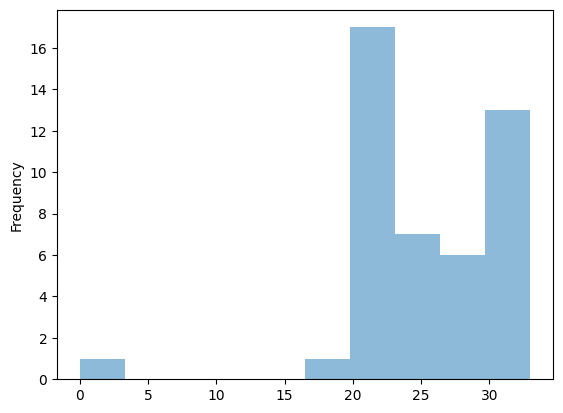

In [25]:
df["Age"].plot.hist(alpha=0.5)

<Axes: xlabel='Grade'>

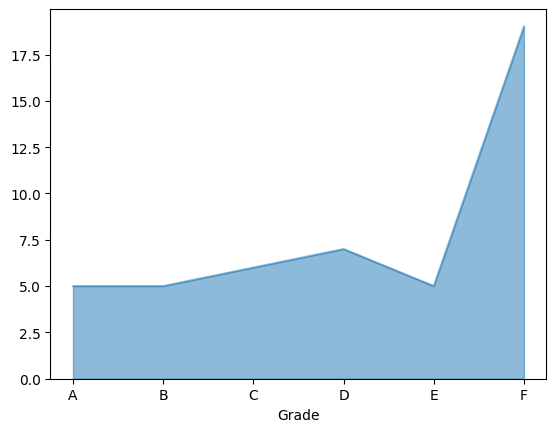

In [26]:
df_gradeCount["FinalGrade"].plot.area(stacked=False)